(linearregression)=
# Lineare Regression

:::{admonition} **Lernziele**
- lineare Regression einsetzen
- mit Annahmen und python-Werkzeugen
- um Daten zu analysieren und zu modellieren
:::

## python konfigurieren

### Module importieren

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy import stats
import shutil

print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('scipy', scipy.__version__)
print('shutil', shutil)

Versionen der verwendeten python-Module: 
numpy 2.1.1
matplotlib 3.9.2
pandas 2.2.3
scipy 1.14.1
shutil <module 'shutil' from '/home/franzi/.pyenv/versions/miniconda3-latest/lib/python3.12/shutil.py'>


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
if shutil.which('latex'): plt.rcParams['text.usetex'] = True

## Lineare Regression

Lineare Regression bedeutet, dass man annimmt, dass sich eine Datenreihe $y_i(x_i)$ mit einer Gerade modellieren lässt:

\begin{equation}
y = m\cdot x + b
\end{equation}

Die Gerade $y(x)$ hat die Steigung $m$ und den $y$-Achsen-Abschnitt $b$.

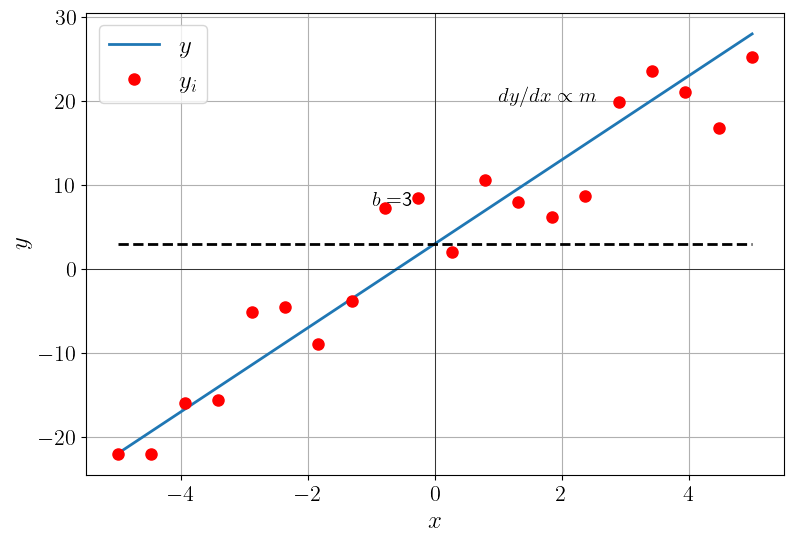

In [3]:
x = np.linspace(-5,5,1000)
m = 5
b = 3
y = m*x+b
xi = np.linspace(-5,5,20)
yi = m*xi+b+5*np.random.randn(len(xi))
plt.figure(figsize=(9,6))
plt.plot(x,y,label=r'$y$')
plt.plot(xi,yi,'ro',label=r'$y_i$')
plt.axhline(color='black', lw=0.5)
plt.axvline(color='black', lw=0.5)
plt.text(-1,b*2.5,r'$b=$'+str(b), fontsize='15')
plt.plot([np.min(x),np.max(x)],[b,b],'k--')
plt.text(1,4*m,r'$dy/dx \propto m$', fontsize='15')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()
plt.grid()
plt.show()

## Wie man die Gerade findet

Wir gehen davon aus, dass $x_i$ und $y_i$ bekannt sind, z. B. aus Messungen oder anderen externen Quellen. Nun wollen wir die Gerade finden oder sehen, ob es eine gibt. Der Parameter $R^2 = \frac{1}{n}\sum_i (y_i - y)^2$ gibt an, wie gut das Modell stimmt.

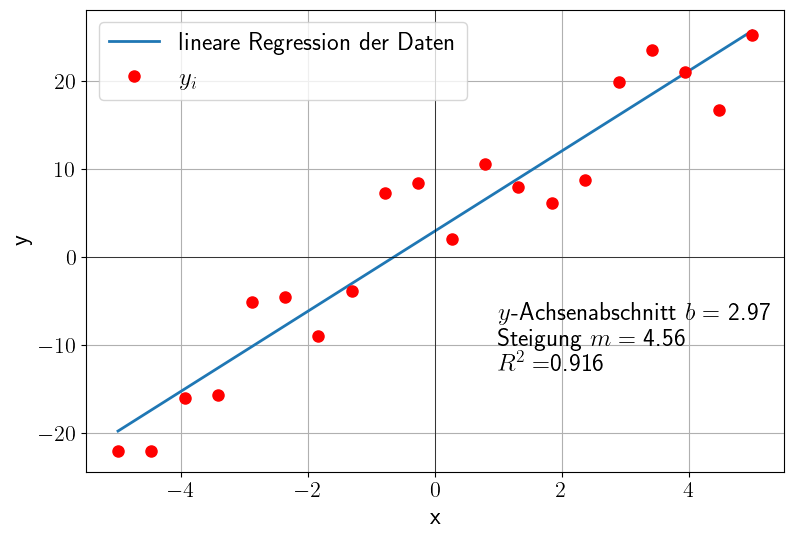

In [4]:
res = stats.linregress(xi, yi)
reg_text = r'$y$-Achsenabschnitt $b=$ ' '{:.2f} \nSteigung ' r'$m=$ ' '{:.2f}\n' r'$R^2=$' '{:.3f}'.format(res.intercept,res.slope,res.rvalue**2)
plt.figure(figsize=(9,6))
plt.plot(xi, res.intercept + res.slope*xi,label='lineare Regression der Daten')
plt.plot(xi,yi,'ro',label='$y_i$')
plt.axhline(color='black', lw=0.5)
plt.axvline(color='black', lw=0.5)
plt.text(1,-13,reg_text)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

## Nutzung für die Einschätzung von Energiedaten

Datensatz von Messdaten an kollaborativen Robotern {cite:p}`9wnt-8v86-21`.

In [5]:
df = pd.read_csv('../data/datasets/UR10_Load2_DataSet5.csv')
df['P'] = df['V']*df['I']

Eigentlich müsste das Drehmoment $M$ der Roboterarme mit der elektrischen Leistung $P$ zusammenhängen über $P_{\text{mech}} = \eta \cdot P_{el} = M \cdot n$. 

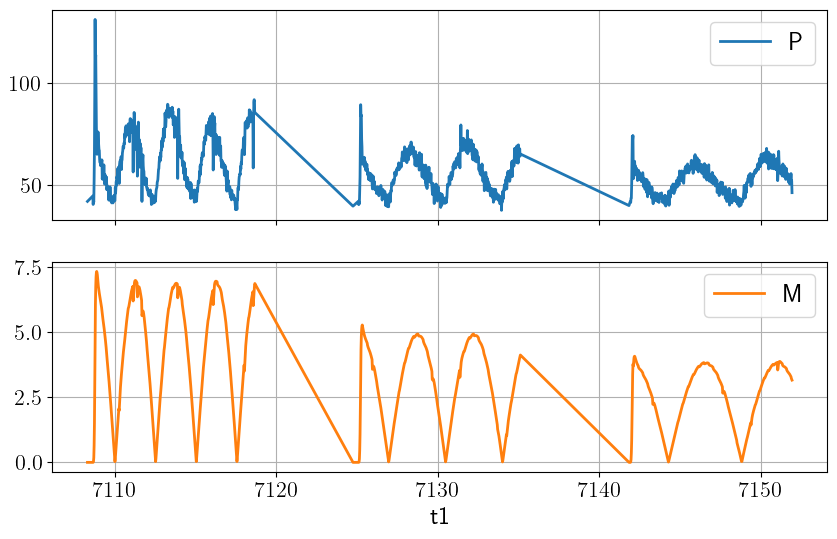

In [6]:
df.plot(x='t1', y=['P','M'], subplots=True, grid='Both')
plt.show()

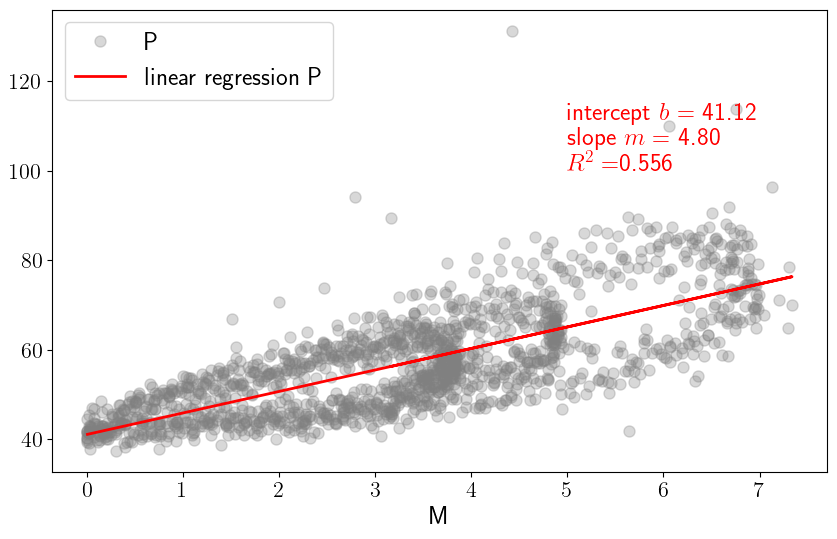

In [7]:
robotfit = stats.linregress(df['M'],df['P'])
rtext = r'intercept $b=$ ' '{:.2f} \nslope ' r'$m=$ ' '{:.2f}\n' r'$R^2=$' '{:.3f}'.format(robotfit.intercept,robotfit.slope,robotfit.rvalue**2)
df['linear regression P'] = robotfit.intercept + robotfit.slope*df['M']
ax = df.plot(x='M',y='P',style='o',color='gray',alpha=0.3)
df.plot(x = 'M', y='linear regression P', style='-', color='red', ax=ax)
plt.text(5,100,rtext,color='red')
plt.show()

Am $R^2$-Wert und der Darstellung wird deutlich, dass die lineare Regression hier zwar den richtigen Trend wiedergibt, aber kein genaues Modell der Daten liefern kann. Dennoch könnte man dieses Modell für Abschätzungen verwenden. Beispielsweise könnte man damit errechnen, welches ein wahrscheinlicher Leistungswert bei einem Drehmoment von 8 Nm ist.

:::{bibliography}
:filter: docname in docnames
:::